In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/"
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [ ]:
!kaggle datasets download -d fedesoriano/heart-failure-prediction

heart-failure-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
%cp heart-failure-prediction.zip  /content/

In [ ]:
%cd /content/

/content


In [ ]:
!unzip heart-failure-prediction.zip

Archive:  heart-failure-prediction.zip
  inflating: heart.csv               


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import graphviz

In [ ]:
data = pd.read_csv('/content/heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data['FastingBS'].unique()

array([0, 1])

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# check missing value
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
non_numerical_data = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for col in non_numerical_data:
    print(col, ": \n\n", data[col].unique())

Sex : 

 ['M' 'F']
ChestPainType : 

 ['ATA' 'NAP' 'ASY' 'TA']
RestingECG : 

 ['Normal' 'ST' 'LVH']
ExerciseAngina : 

 ['N' 'Y']
ST_Slope : 

 ['Up' 'Flat' 'Down']


In [ ]:
# check duplicates
data.duplicated().sum()

0

In [ ]:
encoder = LabelEncoder()
new_data = data.copy()
for col in non_numerical_data:
    new_data[col] = encoder.fit_transform(data[col])
new_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
X = new_data.drop(labels = ['HeartDisease'], axis = 1)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [ ]:
y = new_data['HeartDisease']
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
print('Train Size: \n', x_train.shape)
print('Test Size: \n', x_test.shape)

Train Size: 
 (826, 11)
Test Size: 
 (92, 11)


In [ ]:
dtc = DecisionTreeClassifier(criterion = 'entropy')
model = dtc.fit(x_train, y_train)

In [ ]:
prediction = dtc.predict(x_test)
print('Accuracy: ', metrics.accuracy_score(y_test, prediction))

Accuracy:  0.8804347826086957


In [ ]:
metrics.confusion_matrix(y_test, prediction)

array([[35,  5],
       [ 6, 46]])

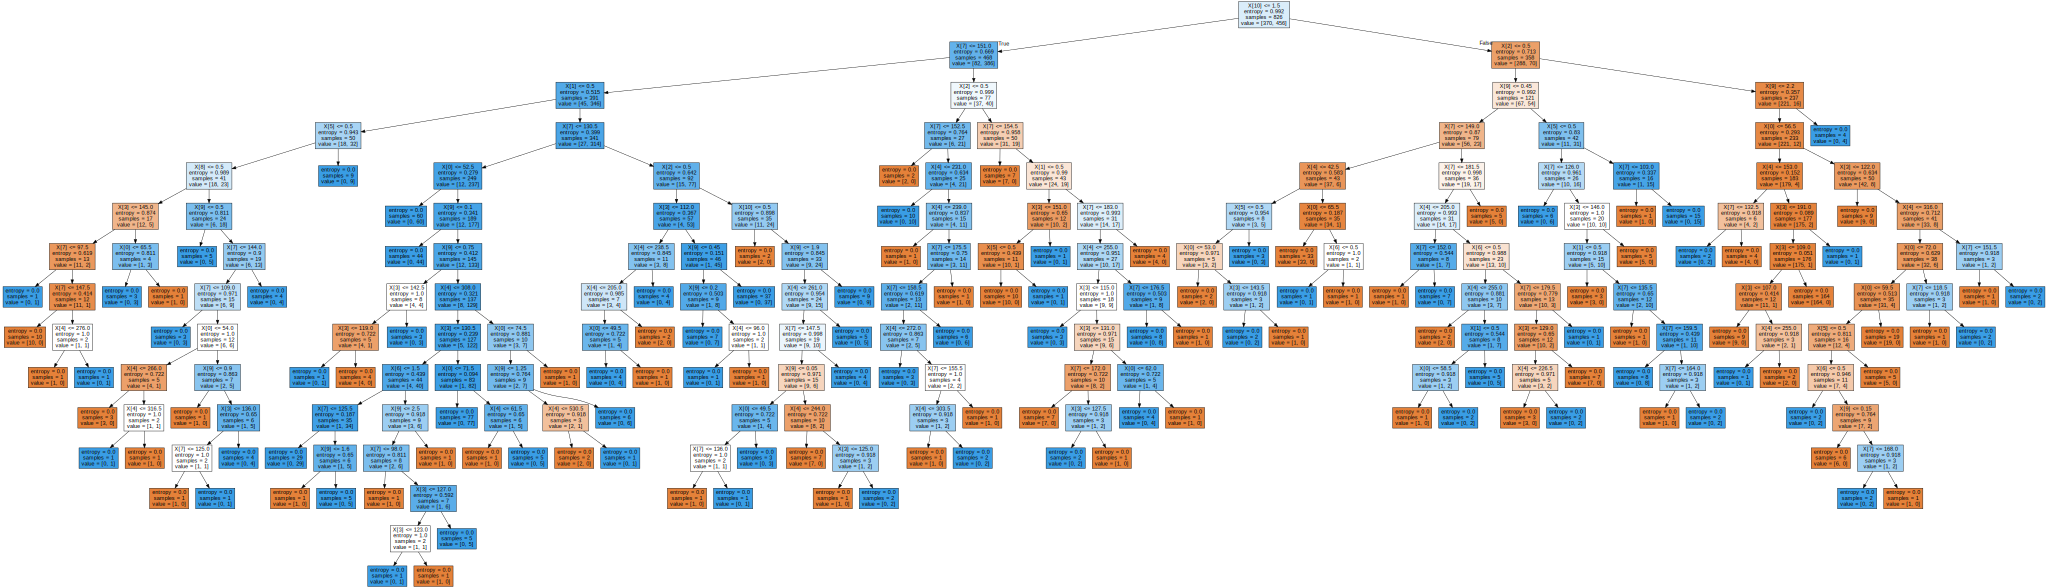

In [ ]:
dot_data = tree.export_graphviz(dtc,filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph


In [ ]:
plt.show(graph)

In [ ]:
# get the text representation
text_representation = tree.export_text(dtc)
print(text_representation)

|--- feature_10 <= 1.50
|   |--- feature_7 <= 151.00
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_5 <= 0.50
|   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |--- feature_3 <= 145.00
|   |   |   |   |   |   |--- feature_7 <= 97.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_7 >  97.50
|   |   |   |   |   |   |   |--- feature_7 <= 147.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_7 >  147.50
|   |   |   |   |   |   |   |   |--- feature_4 <= 276.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_4 >  276.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_3 >  145.00
|   |   |   |   |   |   |--- feature_0 <= 65.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  65.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |--- feat

In [ ]:
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [ ]:
y_train

34     0
144    1
308    1
839    0
358    1
      ..
835    1
192    0
629    0
559    1
684    1
Name: HeartDisease, Length: 826, dtype: int64

In [ ]:
rules = get_rules(dtc, x_train.columns, "HeartDisease")
for r in rules:
    print(r)

if (ST_Slope > 1.5) and (ChestPainType > 0.5) and (Oldpeak <= 2.2) and (Age <= 56.5) and (Cholesterol > 153.0) and (RestingBP <= 191.0) and (RestingBP > 109.0) then class: H (proba: 100.0%) | based on 164 samples
if (ST_Slope <= 1.5) and (MaxHR <= 151.0) and (Sex > 0.5) and (MaxHR <= 130.5) and (Age > 52.5) and (Oldpeak > 0.1) and (Oldpeak > 0.75) and (Cholesterol <= 308.0) and (RestingBP > 130.5) and (Age <= 71.5) then class: e (proba: 100.0%) | based on 77 samples
if (ST_Slope <= 1.5) and (MaxHR <= 151.0) and (Sex > 0.5) and (MaxHR <= 130.5) and (Age <= 52.5) then class: e (proba: 100.0%) | based on 60 samples
if (ST_Slope <= 1.5) and (MaxHR <= 151.0) and (Sex > 0.5) and (MaxHR <= 130.5) and (Age > 52.5) and (Oldpeak <= 0.1) then class: e (proba: 100.0%) | based on 44 samples
if (ST_Slope <= 1.5) and (MaxHR <= 151.0) and (Sex > 0.5) and (MaxHR > 130.5) and (ChestPainType <= 0.5) and (RestingBP > 112.0) and (Oldpeak > 0.45) then class: e (proba: 100.0%) | based on 37 samples
if (ST_Sl

SystemError: ignored